In [3]:
import os, sys
from pathlib import Path

BASE_DIR = Path(Path.home(), "workspace", "services", "credit_model")
DATA_DIR = Path(Path.home(), "workspace", "data")
if BASE_DIR not in sys.path:
    sys.path.insert(0, f"{BASE_DIR}")

In [4]:
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import toad

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from util import woe_helper
from util import woe_mono
from util import scorebin_helper
from util import report_helper

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.width', 1000)

# 加载数据

In [8]:
fp_data = Path(DATA_DIR, 'tutorial', 'data.csv')
df_data = pd.read_csv(fp_data, index_col=None)

In [9]:
num_cols = ['Collateral_valuation', 'Age', 'Properties_Total', 'Amount', 'Term', 'Historic_Loans', 'Current_Loans', 'Max_Arrears']
cat_cols = ['Region', 'Area', 'Activity', 'Guarantor', 'Collateral', 'Properties_Status']
features = num_cols + cat_cols
label = 'Defaulter'

In [10]:
for c in cat_cols:
    df_data.loc[:, c] = df_data.loc[:, c].apply(lambda x: str(f"cat_{x}"))

# 获得分箱和编码

In [11]:
woe = woe_helper.WOE()
woe.fit(df_data, label, exclude=['AppNo', label], method='dt')

100%|██████████| 14/14 [00:00<00:00, 33.80it/s]


finish combiner fit
finish combiner transform


100%|██████████| 14/14 [00:00<00:00, 33.06it/s]

finish WOE fit


In [12]:
df_woe = woe.transform(df_data)
df_bin = woe.transform(df_data, bin_only=True)

100%|██████████| 14/14 [00:00<00:00, 66.69it/s]


# 特征统计报表和区分度报表

In [13]:
df_report = report_helper.FTReport.get_report(df_bin, features, label)

In [14]:
df_report

,feature,bin,total_pct,total,bad,bad_rate
0,Collateral_valuation,00.[-inf ~ 2057.0),0.15534,7767,657,0.084589
1,Collateral_valuation,01.[2057.0 ~ 4571.0),0.17190,8595,988,0.114951
2,Collateral_valuation,02.[4571.0 ~ 8324.5),0.11508,5754,884,0.153632
3,Collateral_valuation,03.[8324.5 ~ 13823.5),0.06604,3302,604,0.182919
4,Collateral_valuation,04.[13823.5 ~ inf),0.06090,3045,891,0.292611
5,Collateral_valuation,05.nan,0.43074,21537,4195,0.194781
6,None,None,NaN,None,None,NaN
0,Age,00.[-inf ~ 27.5),0.10460,5230,1316,0.251625
1,Age,01.[27.5 ~ 34.5),0.18576,9288,1940,0.208872
2,Age,02.[34.5 ~ 41.5),0.21740,10870,1833,0.168629


In [15]:
df_eval = report_helper.FTReport.eval_metrics(df_woe, features, label)

In [16]:
df_combined_report = df_report.merge(df_eval, on='feature', how='left')
df_combined_report.head(100)

,feature,bin,total_pct,total,bad,bad_rate,iv,auc,ks
0,Collateral_valuation,00.[-inf ~ 2057.0),0.15534,7767,657,0.084589,0.157705,0.602955,0.161100
1,Collateral_valuation,01.[2057.0 ~ 4571.0),0.17190,8595,988,0.114951,0.157705,0.602955,0.161100
2,Collateral_valuation,02.[4571.0 ~ 8324.5),0.11508,5754,884,0.153632,0.157705,0.602955,0.161100
3,Collateral_valuation,03.[8324.5 ~ 13823.5),0.06604,3302,604,0.182919,0.157705,0.602955,0.161100
4,Collateral_valuation,04.[13823.5 ~ inf),0.06090,3045,891,0.292611,0.157705,0.602955,0.161100
5,Collateral_valuation,05.nan,0.43074,21537,4195,0.194781,0.157705,0.602955,0.161100
6,None,None,NaN,None,None,NaN,NaN,NaN,NaN
7,Age,00.[-inf ~ 27.5),0.10460,5230,1316,0.251625,0.096882,0.586670,0.133332
8,Age,01.[27.5 ~ 34.5),0.18576,9288,1940,0.208872,0.096882,0.586670,0.133332
9,Age,02.[34.5 ~ 41.5),0.21740,10870,1833,0.168629,0.096882,0.586670,0.133332


In [17]:
df_combined_report.to_csv('report.csv')

# 指标解析

In [14]:
from util import metric_helper
from sklearn import metrics

In [15]:
fp_data = Path(DATA_DIR, 'tutorial', 'data_woe_result.csv')
df_data = pd.read_csv(fp_data, index_col=None)

In [16]:
print(metric_helper.Metric.get_auc(df_data[label], df_data['Amount']))

0.6189114871445145


In [17]:
df_stat = metric_helper.Metric.get_ks_lift_table(df_data[label], df_data['Amount'])
df_stat

,index,label,prob,total,good,bad,cum_total,cum_good,cum_bad,total_cdf,good_cdf,bad_cdf,ks,lift
0,44094,1,0.749638,1,0,1,1,0,1,0.00002,0.000000,0.000122,0.000122,6.083465
1,11234,1,0.749638,1,0,1,2,0,2,0.00004,0.000000,0.000243,0.000243,6.083465
2,31712,0,0.749638,1,1,0,3,1,2,0.00006,0.000024,0.000243,0.000219,4.055643
3,11160,1,0.749638,1,0,1,4,1,3,0.00008,0.000024,0.000365,0.000341,4.562599
4,11161,0,0.749638,1,1,0,5,2,3,0.00010,0.000048,0.000365,0.000317,3.650079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25535,0,-0.521944,1,1,0,49996,41778,8218,0.99992,0.999928,0.999878,-0.000050,0.999958
49996,25534,0,-0.521944,1,1,0,49997,41779,8218,0.99994,0.999952,0.999878,-0.000074,0.999938
49997,25533,0,-0.521944,1,1,0,49998,41780,8218,0.99996,0.999976,0.999878,-0.000098,0.999918
49998,25526,1,-0.521944,1,0,1,49999,41780,8219,0.99998,0.999976,1.000000,0.000024,1.000020


In [18]:
print(metrics.auc(df_stat['good_cdf'], df_stat['bad_cdf']))

0.6180760106204334


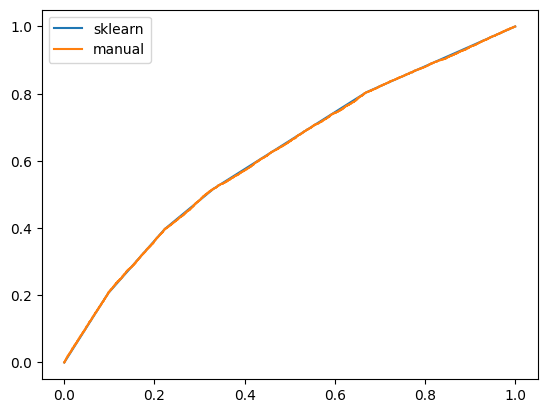

In [19]:
fpr, tpr, thr = metrics.roc_curve(df_data[label], df_data['Amount'])

plt.plot(fpr, tpr, label='sklearn')
plt.plot(df_stat['good_cdf'], df_stat['bad_cdf'], label='manual')
plt.legend()

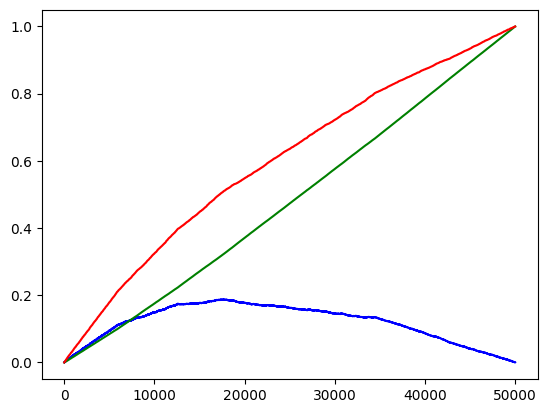

In [20]:
plt.plot(df_stat['ks'], '-b', label='KS')
plt.plot(df_stat['good_cdf'], '-g', label='Good CDF (FPR)')
plt.plot(df_stat['bad_cdf'], '-r', label='Bad CDF (TPR)')

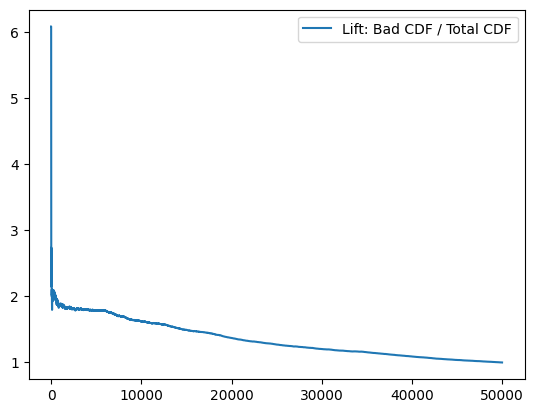

In [21]:
plt.plot(df_stat['lift'], label='Lift: Bad CDF / Total CDF')
plt.legend()